In [ ]:
!pip install ultralytics roboflow


In [ ]:
!pip install roboflow


from roboflow import Roboflow
rf = Roboflow(api_key="Y24Kuy5oCPm18Az7EbaV")
project = rf.workspace("tomiefrogie").project("digit-detection-ymp5l")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Digit-Detection-3 in yolov8:: 100%|██████████| 5988/5988 [00:00<00:00, 11283.26it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# 1. Load the pre-trained YOLOv8n model weights
model = YOLO('yolov8n.pt')

# 2. Configure and start training
results = model.train(
    # --- Data & Model ---
    data='/content/Digit-Detection-3/data.yaml',
    model='yolov8n.pt',

    # --- Training Parameters (As required) ---
    epochs=100,
    imgsz=416,
    batch=16,

    # --- Optimizer & Learning Rate --
    optimizer='AdamW',

    # --- Augmentation & Robustness (As required) ---

    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    perspective=0.0005,

    # --- Monitoring ---

    name='digit_detection_yolov8n_416'
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Digit-Detection-3/data.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=digit_detection_yolov8n_416, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, pe


Displaying Confusion Matrix from: /content/runs/detect/digit_detection_yolov8n_416/confusion_matrix.png


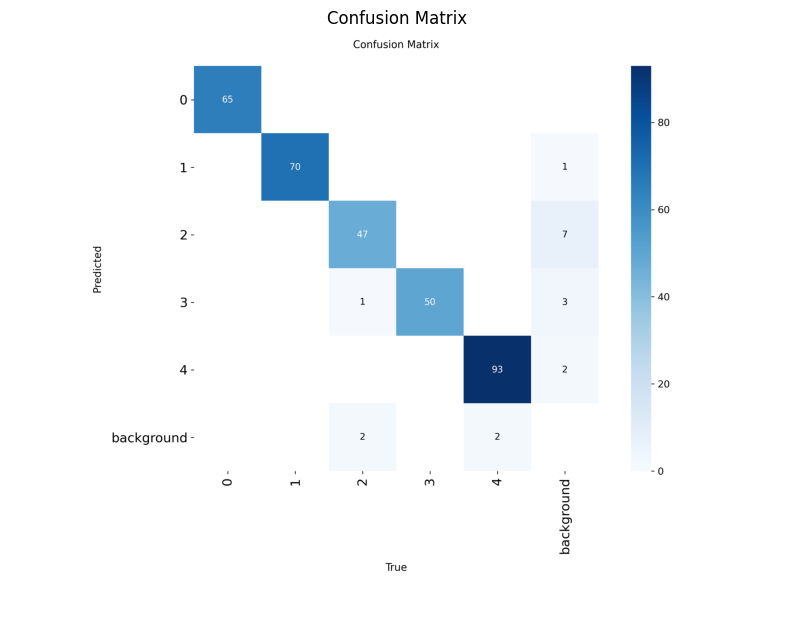


Displaying Results Plot from: /content/runs/detect/digit_detection_yolov8n_416/results.png


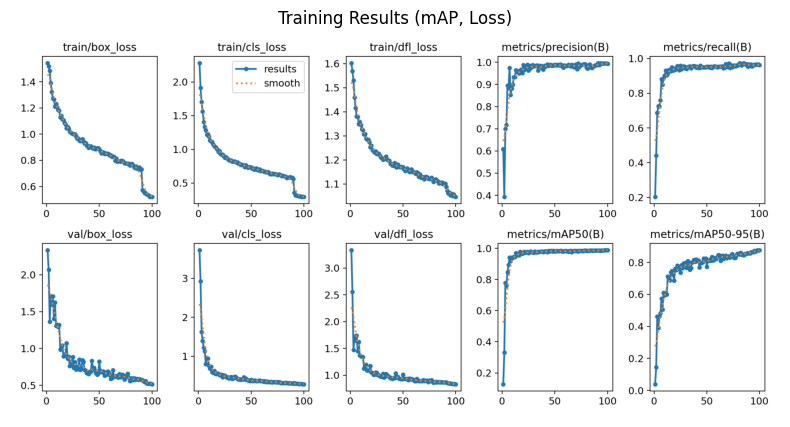

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Path to your run directory
run_dir = '/content/runs/detect/digit_detection_yolov8n_416'

# Display Confusion Matrix
print(f"\nDisplaying Confusion Matrix from: {run_dir}/confusion_matrix.png")
plt.figure(figsize=(10, 10))
img_conf_matrix = cv2.imread(f'{run_dir}/confusion_matrix.png')
plt.imshow(cv2.cvtColor(img_conf_matrix, cv2.COLOR_BGR2RGB))
plt.title('Confusion Matrix')
plt.axis('off')
plt.show()

# Display Results Plot (e.g., mAP, loss curves)
print(f"\nDisplaying Results Plot from: {run_dir}/results.png")
plt.figure(figsize=(10, 5))
img_results = cv2.imread(f'{run_dir}/results.png')
plt.imshow(cv2.cvtColor(img_results, cv2.COLOR_BGR2RGB))
plt.title('Training Results (mAP, Loss)')
plt.axis('off')
plt.show()

In [ ]:
from ultralytics import YOLO

# 1. Load your best trained model weights
# Ensure this path is correct based on your previous training run!
model = YOLO('/content/runs/detect/digit_detection_yolov8n_416/weights/best.pt')

# 2. Export the model to ONNX format
# imgsz: Use the smaller inference size recommended for the Pi, 320 or 416.
#       Using a fixed, smaller size helps with stability and speed on the Pi.
# simplify=True: Applies ONNX simplifier to optimize the computational graph.
# half=False: Ensures FP32 precision, which is safer for standard CPU inference on the Pi.
# opset=17: Recommended modern ONNX operator set version.
path = model.export(
    format='onnx',
    imgsz=320,  # Use a reduced size (320 or 416) for real-time speed on RPi
    simplify=True,
    half=False,
    opset=17
)

print(f"ONNX model saved to: {path}")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/digit_detection_yolov8n_416/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 9, 2100) (5.9 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 296ms
Prepared 6 packages in 7.50s
Installed 6 packages in 249ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.77

requirements: AutoUpdate success ✅ 8.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take ef

In [ ]:
!pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 100.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2

# 1. Load the exported ONNX model
onnx_model = YOLO('/content/runs/detect/digit_detection_yolov8n_416/weights/best.onnx')

# 2. Run a prediction on a sample image from your validation set
# The output format and post-processing are handled automatically by the YOLO class
sample_image = cv2.imread('/content/Digit-Detection-3/valid/images/frame_000104_jpg.rf.02b695c14c0c24cf3cba63c96bf36d2a.jpg')
onnx_results = onnx_model.predict(
    source=sample_image,
    imgsz=320,  # Must match the export size for this test
    conf=0.25,
    iou=0.45,
    verbose=False
)

# 3. Check the results
print("--- ONNX Model Validation Results ---")
for r in onnx_results:
    # Check if detections were made
    if len(r.boxes) > 0:
        print(f"Detections found: {len(r.boxes)} boxes")
        # Print a sample box for verification
        box = r.boxes[0].xyxy[0].tolist()
        conf = r.boxes[0].conf[0].item()
        cls = r.boxes[0].cls[0].item()
        print(f"Example BBox: {box[:4]} | Conf: {conf:.2f} | Class: {int(cls)}")
    else:
        print("No detections found. Check model integrity.")

Loading /content/runs/detect/digit_detection_yolov8n_416/weights/best.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime with CUDA. Using CPU...
Using ONNX Runtime 1.23.2 CPUExecutionProvider
--- ONNX Model Validation Results ---
Detections found: 1 boxes
Example BBox: [79.4021987915039, 0.0, 329.5579528808594, 329.0462951660156] | Conf: 0.88 | Class: 4
